In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [18]:

from tensorflow.python.keras.layers import Dense


In [19]:

import tensorflow 
print(tensorflow.__version__)



2.8.0


In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential

In [6]:
ls

gdrive/  sample_data/


In [7]:
cd gdrive/MyDrive/my_dataset

/content/gdrive/MyDrive/my_dataset


In [8]:
ls

test/  train/  validation/


In [9]:
train = '/content/gdrive/MyDrive/my_dataset/train'
validation = '/content/gdrive/MyDrive/my_dataset/validation'
test ="/content/gdrive/MyDrive/my_dataset/test"

In [10]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   )

val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen =ImageDataGenerator(rescale=1. / 255)

In [29]:
batch_size = 16
learning_rate = 0.0001
epoch = 20


# Defining image width and height respectively
img_rows = 100
img_cols = 100

In [12]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    shuffle=True,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(validation,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = True, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = True, class_mode='categorical')

Found 4577 images belonging to 2 classes.
Found 573 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [30]:
steps_per_epoch = 30
print("Steps per epoch: ",steps_per_epoch)

Steps per epoch:  30


RESNET50 MODEL TRAINING

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50
# The sequential API allows you to create models layer-by-layer
resnet_model = Sequential()
resnet_model.add(ResNet50(include_top=False, 
                   pooling='max', 
                   weights='imagenet'))

resnet_model.add(Dense(2, activation="softmax"))

# Summary: to find the number of parameters
resnet_model.layers[0].trainable=False
resnet_model.summary()
sgd = tensorflow.keras.optimizers.SGD(lr=learning_rate, decay=0.00001,momentum = 0.0,nesterov=False)
resnet_model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2)                4098      
 er)                                                             
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [53]:
# Trains the model for a given number of epochs (iterations on a dataset).
resnet_training = resnet_model.fit_generator(train_generator,
                               steps_per_epoch = steps_per_epoch,
                               epochs = epoch,
                               validation_data = validation_generator,
                               validation_steps = 18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
30/30 [==============================] - 36s 1s/step - loss: 0.6253 - accuracy: 0.6917 - val_loss: 0.5803 - val_accuracy: 0.9167
Epoch 2/20
30/30 [==============================] - 33s 1s/step - loss: 0.6330 - accuracy: 0.6602 - val_loss: 0.5661 - val_accuracy: 0.9444
Epoch 3/20
30/30 [==============================] - 33s 1s/step - loss: 0.6120 - accuracy: 0.6667 - val_loss: 0.7110 - val_accuracy: 0.3542
Epoch 4/20
30/30 [==============================] - 33s 1s/step - loss: 0.6057 - accuracy: 0.6792 - val_loss: 0.6456 - val_accuracy: 0.6215
Epoch 5/20
30/30 [==============================] - 34s 1s/step - loss: 0.6118 - accuracy: 0.7354 - val_loss: 0.7539 - val_accuracy: 0.2708
Epoch 6/20
30/30 [==============================] - 33s 1s/step - loss: 0.6163 - accuracy: 0.6625 - val_loss: 0.8442 - val_accuracy: 0.2153
Epoch 7/20
30/30 [==============================] - 33s 1s/step - loss: 0.6149 - accuracy: 0.6438 - val_loss: 0.8538 - val_accuracy: 0.2153
Epoch 8/20
30/30 [==

In [54]:
training_accuracy_resnet      = resnet_training.history['accuracy'][-1]
training_loss_resnet          = resnet_training.history['loss'][-1]
validation_accuracy_resnet    = resnet_training.history['val_accuracy'][-1]
validation_loss_resnet        = resnet_training.history['val_loss'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)

Training Accuracy ResNet   : 0.71875
Training Loss ResNet       : 0.5847371816635132
Validation Accuracy ResNet : 0.7256944179534912
Validation Loss ResNet     : 0.5980640053749084


In [55]:
# Generating Confusion Matrix and Classification Report
Y_pred_res = resnet_model.predict_generator(test_generator, 1727 // batch_size+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(test_generator.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['go','stop']
class_rep_res = classification_report(test_generator.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[173  68]
 [  4 331]]
Classification Report
              precision    recall  f1-score   support

          go       0.98      0.72      0.83       241
        stop       0.83      0.99      0.90       335

    accuracy                           0.88       576
   macro avg       0.90      0.85      0.86       576
weighted avg       0.89      0.88      0.87       576



In [56]:
print(resnet_training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


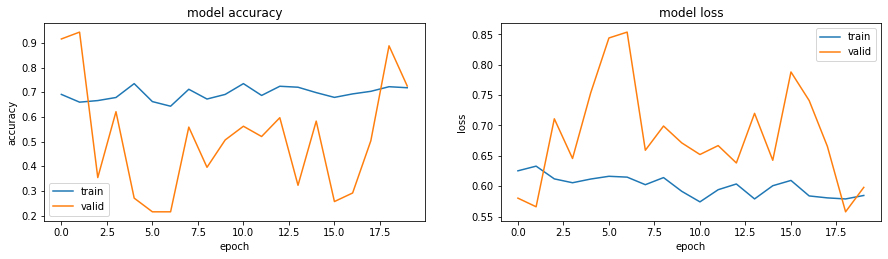

In [57]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (15,8))   
plt.subplot(221)  
plt.plot(resnet_training.history['accuracy'])  
plt.plot(resnet_training.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(resnet_training.history['loss'])  
plt.plot(resnet_training.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()


INCEPTION MODEL TRAINING

In [41]:
batch_size = 16
learning_rate = 0.0001
epoch = 20


# Defining image width and height respectively
img_rows = 100
img_cols = 100
steps_per_epoch = 30
print("Steps per epoch: ",steps_per_epoch)

Steps per epoch:  30


In [35]:
# Custom network
model_cn = Sequential()
model_cn.add(Conv2D(16,(3,3),input_shape=(256,256,3),padding='same'))
model_cn.add(Activation('relu'))
model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))
model_cn.add(Dropout(0.25))


model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(64,(3,3),padding='same'))
model_cn.add(Activation('relu'))
model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Flatten())
model_cn.add(Dense(256,activation='relu'))
#model.add(LeakyReLU(0.1))
model_cn.add(Dropout(0.5))
model_cn.add(Dense(10))
model_cn.add(Activation("softmax"))

model_cn.summary()


model_cn.compile(loss="categorical_crossentropy",
                  optimizer= 'adam',
                  metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_376 (Conv2D)         (None, 256, 256, 16)      448       
                                                                 
 activation_376 (Activation)  (None, 256, 256, 16)     0         
                                                                 
 batch_normalization_376 (Ba  (None, 256, 256, 16)     64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_377 (Conv2D)         (None, 128, 128, 32)      4640      
                                                                 
 activation_377 (Activation)  (None, 128, 128, 32)    